In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
dt = [[1,'yes', '미혼', 125, 'no'],
      [2, 'no', '기혼', 100, 'no'], 
      [3, 'no', '미혼', 70, 'no'], 
      [4, 'yes', '기혼', 120, 'no'],
      [5, 'no', '이혼', 95, 'yes'],
      [6, 'no', '기혼', 60, 'no'],
      [7, 'yes', '이혼', 220, 'no'],
      [8, 'no', '미혼', 85, 'yes'],
      [9, 'no', '기혼', 75, 'no'],
      [10, 'no', '미혼', 90, 'yes']]
datas = pd.DataFrame(data=dt, columns=['ID', '집 소유', '결혼', '연소득(K)', '채무불이행'])

In [6]:
datas

,ID,집 소유,결혼,연소득(K),채무불이행
0,1,yes,미혼,125,no
1,2,no,기혼,100,no
2,3,no,미혼,70,no
3,4,yes,기혼,120,no
4,5,no,이혼,95,yes
5,6,no,기혼,60,no
6,7,yes,이혼,220,no
7,8,no,미혼,85,yes
8,9,no,기혼,75,no
9,10,no,미혼,90,yes


In [44]:
datas['집 소유']

0    yes
1     no
2     no
3    yes
4     no
5     no
6    yes
7     no
8     no
9     no
Name: 집 소유, dtype: object

In [23]:
datas.dtypes

ID         int64
집 소유      object
결혼        object
연소득(K)     int64
채무불이행     object
dtype: object

In [7]:
def solution(datas):
    if datas['집 소유'] == 'no':
        if datas['결혼'] != '기혼':
            if datas['연소득(K)'] < 70:
                return 'yes'
            return 'no'
        return 'no'

In [8]:
# 1번 조건 식
datas[datas['집 소유'] != 'no']

,ID,집 소유,결혼,연소득(K),채무불이행
0,1,yes,미혼,125,no
3,4,yes,기혼,120,no
6,7,yes,이혼,220,no


In [9]:
# 2번 조건 식
datas[(datas['집 소유'] == 'no')&(datas['결혼'] != '기혼')]

,ID,집 소유,결혼,연소득(K),채무불이행
2,3,no,미혼,70,no
4,5,no,이혼,95,yes
7,8,no,미혼,85,yes
9,10,no,미혼,90,yes


In [10]:
# 3번 조건 식
datas[(datas['집 소유'] == 'no')&(datas['결혼'] == '기혼')&(datas['연소득(K)'] < 70)]

,ID,집 소유,결혼,연소득(K),채무불이행
5,6,no,기혼,60,no


In [11]:
# 3번 조건 식
datas[(datas['집 소유'] == 'no')&(datas['결혼'] != '기혼')&(datas['연소득(K)'] > 70)]

,ID,집 소유,결혼,연소득(K),채무불이행
4,5,no,이혼,95,yes
7,8,no,미혼,85,yes
9,10,no,미혼,90,yes


In [12]:
# 4번 조건 식
datas[(datas['집 소유'] == 'no')&(datas['결혼'] == '기혼')&(datas['연소득(K)'] >= 70)]

,ID,집 소유,결혼,연소득(K),채무불이행
1,2,no,기혼,100,no
8,9,no,기혼,75,no


In [13]:
dt = pd.DataFrame({'ID': list(range(1, 11)),
                   '집소유' : ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
                  '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼', '기혼', '이혼', '미혼', '기혼', '미혼'],
                   '연소득(K)' : [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
                   '채무불이행' : ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
                  })
dt.set_index('ID', inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

for i in ['집소유', '결혼', '채무불이행']:
    globals()[f'dt_{i}_encoder'] = LabelEncoder()
    globals()[f'dt_{i}_encoder'].fit(dt[i])
    dt[i] = globals()[f'dt_{i}_encoder'].transform(dt[i])

In [15]:
dt

,집소유,결혼,연소득(K),채무불이행
ID,,,,
1,1,1,125,0
2,0,0,100,0
3,0,1,70,0
4,1,0,120,0
5,0,2,95,1
6,0,0,60,0
7,1,2,220,0
8,0,1,85,1
9,0,0,75,0


In [16]:
print(dt_결혼_encoder.classes_)
print(dt_집소유_encoder.classes_)
print(dt_채무불이행_encoder.classes_)

['기혼' '미혼' '이혼']
['No' 'Yes']
['No' 'Yes']


In [17]:
X = dt.drop('채무불이행', axis=1)
y = dt.채무불이행

In [18]:
X

,집소유,결혼,연소득(K)
ID,,,
1,1,1,125
2,0,0,100
3,0,1,70
4,1,0,120
5,0,2,95
6,0,0,60
7,1,2,220
8,0,1,85
9,0,0,75


In [19]:
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier()

In [20]:
finan_dtclf.fit(X,y)

DecisionTreeClassifier()

In [39]:
!pip install graphviz

     |████████████████████████████████| 47 kB 4.4 MB/s eta 0:00:011


In [21]:
from sklearn.tree import export_graphviz

import graphviz

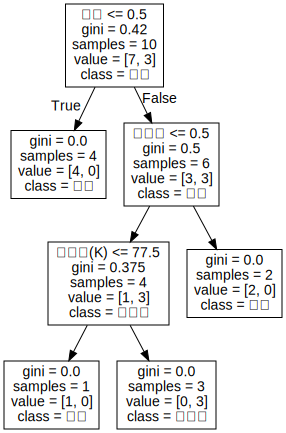

In [23]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=3,
                filled=False,
                leaves_parallel=False,
                rotate=False,
                rounded=False)

with open('./finance1.dot') as f:
    finance1 = f.read()
graphviz.Source(finance1)

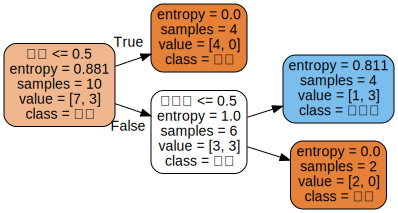

In [90]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=3,
                filled=True,
                leaves_parallel=False,
                rotate=True,
                rounded=True)

with open('./finance1.dot') as f:
    finance1 = f.read()
graphviz.Source(finance1)

In [81]:
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier(max_depth=2)

In [82]:
finan_dtclf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

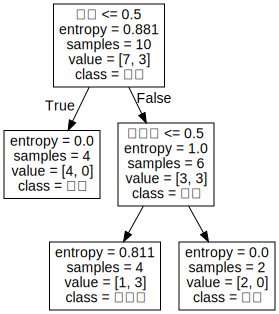

In [88]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=3,
                filled=False,
                leaves_parallel=False,
                rotate=False,
                rounded=False)

with open('./finance1.dot') as f:
    finance1 = f.read()
graphviz.Source(finance1)

In [84]:
from sklearn.tree import DecisionTreeClassifier
finan_dtclf = DecisionTreeClassifier(max_depth=2, criterion='entropy')

In [85]:
finan_dtclf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

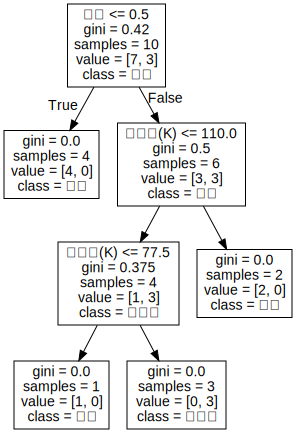

In [152]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=3,
                filled=False,
                leaves_parallel=False,
                rotate=False,
                rounded=False)

with open('./finance1.dot') as f:
    finance1 = f.read()
graphviz.Source(finance1)

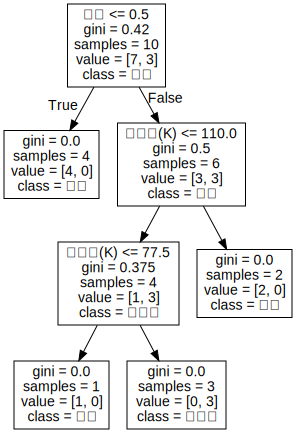

In [154]:
export_graphviz(finan_dtclf, out_file='finance1.dot', 
                feature_names=X.columns,
                class_names=['이행', '불이행'],
                max_depth=3,
                filled=False,
                leaves_parallel=False,
                rotate=False,
                rounded=False)

with open('./finance1.dot') as f:
    finance1 = f.read()
graphviz.Source(finance1)

In [155]:
new ={'ID': list(range(11, 16)),
                   '집소유' : ['No', 'Yes', 'Yes', 'No', 'No'],
                  '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼'],
                   '연소득(K)' : [55, 80, 110, 95, 300]}
new_person = pd.DataFrame(new)
new_person.set_index('ID', inplace=True)
new_person

,집소유,결혼,연소득(K)
ID,,,
11,No,미혼,55
12,Yes,기혼,80
13,Yes,미혼,110
14,No,기혼,95
15,No,이혼,300


In [156]:
from sklearn.preprocessing import LabelEncoder

for i in ['집소유', '결혼']:
    globals()[f'new_person_{i}_encoder'] = LabelEncoder()
    globals()[f'new_person_{i}_encoder'].fit(new_person[i])
    new_person[i] = globals()[f'new_person_{i}_encoder'].transform(new_person[i])

In [157]:
print(new_person_결혼_encoder.classes_)
print(new_person_집소유_encoder.classes_)

['기혼' '미혼' '이혼']
['No' 'Yes']


In [158]:
new_person

,집소유,결혼,연소득(K)
ID,,,
11,0,1,55
12,1,0,80
13,1,1,110
14,0,0,95
15,0,2,300


In [295]:
pred_result = finan_dtclf.predict(new_person)
pred_result1 = dt_채무불이행_encoder.inverse_transform(pred_result)
pred_result

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 결혼
- 연소득(K)
- 집소유
- 채무불이행예측
Feature names seen at fit time, yet now missing:
- age
- age_new
- embarked
- family
- fare
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'No'

array([0, 0, 1, 0, 0])

In [162]:
pred_result1
new_person['채무불이행예측'] = pred_result1

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [163]:
new_person['채무불이행예측'] = pred_result1

In [164]:
new_person

,집소유,결혼,연소득(K),채무불이행예측
ID,,,,
11,0,1,55,No
12,1,0,80,No
13,1,1,110,Yes
14,0,0,95,No
15,0,2,300,No


In [168]:
dt_결혼_encoder.inverse_transform([1])

array(['미혼'], dtype=object)

In [169]:
dt_집소유_encoder.inverse_transform([1])

array(['Yes'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
new = {'ID': list(range(11, 16)),
       '집소유' : ['No', 'Yes', 'Yes', 'No', 'No'],
       '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼'],
       '연소득(K)' : [55, 80, 110, 95, 300]}
new_person = pd.DataFrame(new)
new_person.set_index('ID', inplace=True)
for i in ['집소유', '결혼']:
    globals()[f'new_{i}_encoder'] = LabelEncoder()
    globals()[f'new_{i}_encoder'].fit(new_person[i])
    new_person[i] = globals()[f'new_{i}_encoder'].transform(new_person[i])
pred_result = finan_dtclf.predict(new_person)
pred_result1 = dt_채무불이행_encoder.inverse_transform(pred_result)
new_person['채무불이행예측'] = pred_result1
new_person

NameError: name 'finan_dtclf' is not defined

In [3]:
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
titanic['family'] = titanic.sibsp + titanic.parch
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)
df1 = titanic.copy()
df1.embarked.fillna(value='S', inplace=True)
age_md = df1.groupby(['pclass', 'sex']).age.agg(['median'])
m1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].median()
m2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'male'), 'age'].median()
m3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'male'), 'age'].median()
f1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'female'), 'age'].median()
f2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'female'), 'age'].median()
f3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'female'), 'age'].median()
df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].fillna(m1_med, inplace=True)
df1.loc[(df1.pclass == 1) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.pclass == 1) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f3_med
df1.drop('deck', axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
print(df1_sex_encoder.inverse_transform([0]))
print(df1_embarked_encoder.inverse_transform([0]))
print(df1_age_new_encoder.inverse_transform([0]))

['female']
['C']
['baby']


In [4]:
df1

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2
3,1,1,0,35.0,53.1000,2,1,2
4,0,3,1,35.0,8.0500,2,0,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0,2
887,1,1,0,19.0,30.0000,2,0,2
888,0,3,0,21.5,23.4500,2,3,2
889,1,1,1,26.0,30.0000,0,0,2


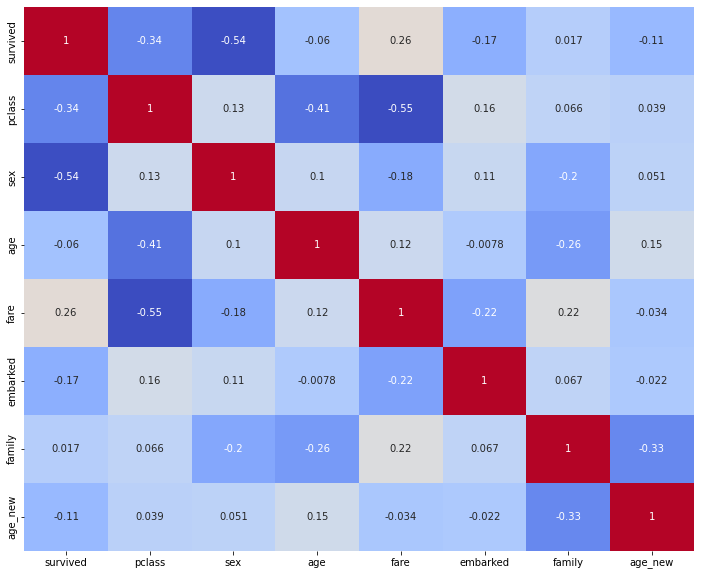

In [193]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr(), annot=True, cmap = 'coolwarm', cbar = False)
plt.show()

In [5]:
X = df1.drop('survived', axis=1)
y = df1.survived

In [19]:
from sklearn.tree import DecisionTreeClassifier
titanic_dtclf = DecisionTreeClassifier(max_depth=6)
titanic_dtclf.fit(X,y)
export_graphviz(titanic_dtclf, out_file='titanic.dot', 
                feature_names=X.columns,
                class_names=['사망', '생존'],
                filled=True)

In [20]:
titanic_dtclf.fit(X,y)

DecisionTreeClassifier(max_depth=6)

In [21]:
export_graphviz(titanic_dtclf, out_file='titanic.dot', 
                feature_names=X.columns,
                class_names=['사망', '생존'],
                filled=True)

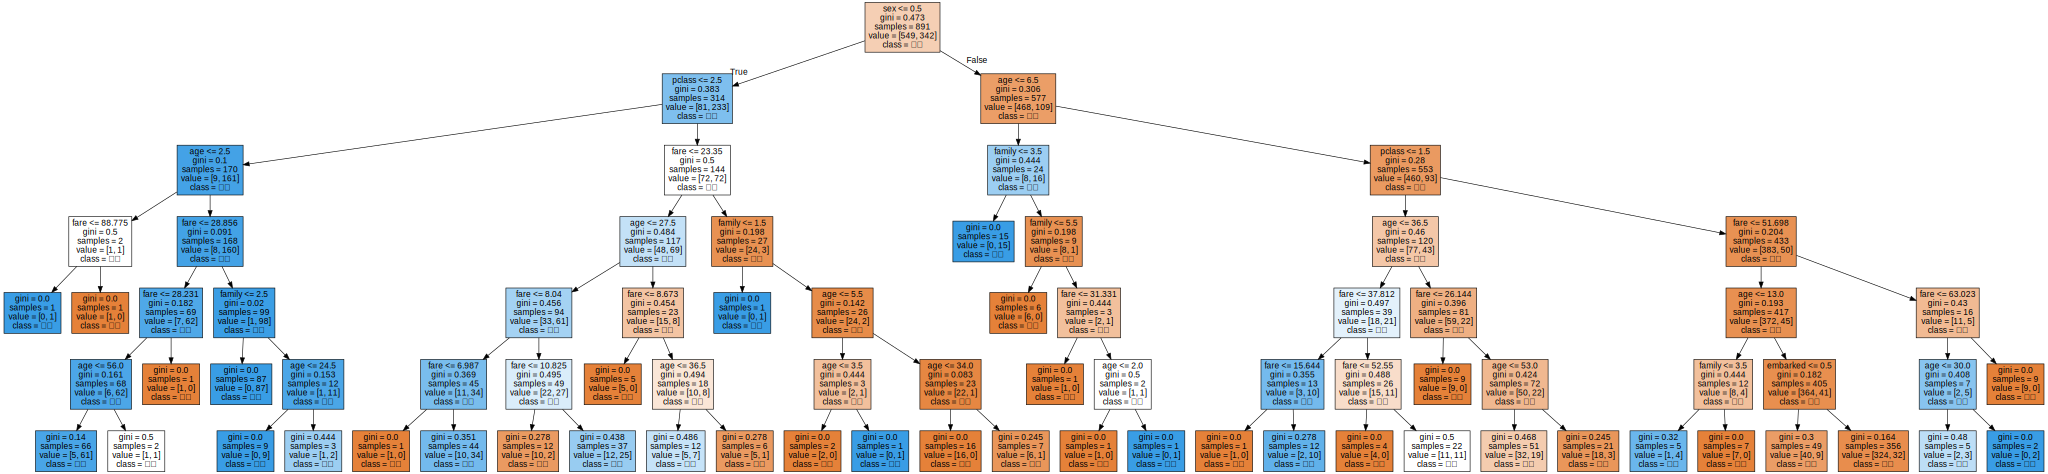

In [24]:
  with open('./titanic.dot') as f:
    titanic1 = f.read()
graphviz.Source(titanic1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
new = {'ID': list(range(11, 16)),
       '집소유' : ['No', 'Yes', 'Yes', 'No', 'No'],
       '결혼' : ['미혼', '기혼', '미혼', '기혼', '이혼'],
       '연소득(K)' : [55, 80, 110, 95, 300]}
new_person = pd.DataFrame(new)
new_person.set_index('ID', inplace=True)
for i in ['집소유', '결혼']:
    globals()[f'new_{i}_encoder'] = LabelEncoder()
    globals()[f'new_{i}_encoder'].fit(new_person[i])
    new_person[i] = globals()[f'new_{i}_encoder'].transform(new_person[i])
pred_result = finan_dtclf.predict(new_person)
pred_result1 = dt_채무불이행_encoder.inverse_transform(pred_result)
new_person['채무불이행예측'] = pred_result1
new_person

In [221]:
test = pd.read_csv('./test.csv')

In [222]:
df1.head(3)

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2


In [223]:
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [224]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [225]:
test['family'] = test.SibSp + test.Parch
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

In [226]:
test.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [227]:
df1.head(3)

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2


In [267]:
test.head(3)

,Pclass,Sex,Age,Fare,Embarked,family
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0


In [228]:
test.Fare.fillna(value=test[(test.family == 0)&(test.Pclass == 3)].Fare.mean(), inplace=True)

In [229]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
Fare         0
Embarked     0
family       0
dtype: int64

In [230]:
test[test.Fare.isna()].Fare

Series([], Name: Fare, dtype: float64)

In [231]:
test_age_md = test.groupby(['Pclass', 'Sex']).Age.agg(['median'])
test_age_md

median
Pclass Sex           
1      female    41.0
       male      42.0
2      female    24.0
       male      28.0
3      female    22.0
       male      24.0

In [232]:
m1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].median()
m2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'male'), 'Age'].median()
m3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'male'), 'Age'].median()
f1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'female'), 'Age'].median()
f2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'female'), 'Age'].median()
f3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'female'), 'Age'].median()
test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].fillna(m1_med, inplace=True)
test.loc[(test.Pclass == 1) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m3_med
test.loc[(test.Pclass == 1) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f3_med

In [233]:
df1.head(3)

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2


In [234]:
test.loc[test.Age >= 50, 'age_new'] = 'old'
test.loc[(test.Age < 50) & (test.Age >= 10), 'age_new'] = 'young'
test.loc[test.Age < 10, 'age_new'] = 'baby'

In [235]:
test.rename(columns={'Pclass':'pclass','Sex':'sex','Age':'age', 'Fare':'fare', 'Embarked':'embarked'}, inplace=True)

In [236]:
test.head(2)

,pclass,sex,age,fare,embarked,family,age_new
0,3,male,34.5,7.8292,Q,0,young
1,3,female,47.0,7.0000,S,1,young


In [237]:
from sklearn.preprocessing import LabelEncoder

for i in ['sex', 'embarked', 'age_new']:
    globals()[f'new_test_{i}_encoder'] = LabelEncoder()
    globals()[f'new_test_{i}_encoder'].fit(test[i])
    test[i] = globals()[f'new_test_{i}_encoder'].transform(test[i])

In [238]:
print(new_test_sex_encoder.classes_)
print(new_test_embarked_encoder.classes_)
print(new_test_age_new_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['baby' 'old' 'young']


In [239]:
print(df1_sex_encoder.classes_)
print(df1_embarked_encoder.classes_)
print(df1_age_new_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['baby' 'old' 'young']


In [240]:
test

,pclass,sex,age,fare,embarked,family,age_new
0,3,1,34.5,7.8292,1,0,2
1,3,0,47.0,7.0000,2,1,2
2,2,1,62.0,9.6875,1,0,1
3,3,1,27.0,8.6625,2,0,2
4,3,0,22.0,12.2875,2,2,2
...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,2
414,1,0,39.0,108.9000,0,0,2
415,3,1,38.5,7.2500,2,0,2
416,3,1,24.0,8.0500,2,0,2


In [241]:
df1_survived_encoder = LabelEncoder()
df1_survived_encoder.fit(df1['survived'])
df1['survived'] = df1_survived_encoder.transform(df1['survived'])

In [242]:
print(df1_survived_encoder.classes_)

[0 1]


In [44]:
pred_result = titanic_dtclf.predict(test)
pred_result1 = df1_survived_encoder.inverse_transform(pred_result)
pred_result

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
test['predict_survived'] = pred_result1

In [46]:
test

,pclass,sex,age,fare,embarked,family,age_new,predict_survived
0,3,1,34.5,7.8292,1,0,2,0
1,3,0,47.0,7.0000,2,1,2,0
2,2,1,62.0,9.6875,1,0,1,0
3,3,1,27.0,8.6625,2,0,2,0
4,3,0,22.0,12.2875,2,2,2,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,2,0
414,1,0,39.0,108.9000,0,0,2,1
415,3,1,38.5,7.2500,2,0,2,0
416,3,1,24.0,8.0500,2,0,2,0


In [47]:
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = tita['predict_survived']
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(1).csv')

NameError: name 'tita' is not defined

In [4]:
from sklearn.tree import DecisionTreeClassifier
titanic_dtclf = DecisionTreeClassifier(max_depth=5)

In [338]:
test

,pclass,sex,age,fare,embarked,family,age_new,predict_survived
0,3,1,34.5,7.8292,1,0,2,0
1,3,0,47.0,7.0000,2,1,2,0
2,2,1,62.0,9.6875,1,0,1,0
3,3,1,27.0,8.6625,2,0,2,0
4,3,0,22.0,12.2875,2,2,2,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0,2,0
414,1,0,39.0,108.9000,0,0,2,1
415,3,1,38.5,7.2500,2,0,2,0
416,3,1,24.0,8.0500,2,0,2,0


In [ ]:
df1.columns[1:]
df_test = pd.read_csv(‘../데이터/titanic/test.csv’)
df_test.head()
df_test.Cabin.value_counts()
df_test.set_index(‘PassengerId’, inplace=True)
df_test.head()
df_test[‘family’] = df_test.SibSp + df_test.Parch
df_test.head()
df_test.drop([‘SibSp’, ‘Parch’, ‘Name’, ‘Ticket’, ‘Cabin’], axis=1, inplace=True)
df_test.head()
df_test.age_new = 0
df_test.loc[df_test.Age >= 50, ‘age_new’] = ‘old’
df_test.loc[(df_test.Age < 50) & (df_test.Age>=10), ‘age_new’] = ‘young’
df_test.loc[df_test.Age < 10, ‘age_new’] = ‘baby’
df_test.head()
df_test.columns = df1.columns[1:]
df_test.head(1)
df_test.isna().sum()
df_test[df_test.fare.isna()]
fare_new = float(df1.loc[(df1.pclass==3)&(df1.sex==1)&(df1.age>60)&(df1.age<62)&(df1.embarked==2), ‘fare’].values)
fare_new
df_test.fare.fillna(fare_new, inplace=True)
df_test.isna().sum()
m1_med = df1.loc[(df1.sex == 1)& (df1.pclass == 1), ‘age’].median()
m2_med = df1.loc[(df1.sex == 1)& (df1.pclass == 2), ‘age’].median()
m3_med = df1.loc[(df1.sex == 1)& (df1.pclass == 3), ‘age’].median()
f1_med = df1.loc[(df1.sex == 0)& (df1.pclass == 1), ‘age’].median()
f2_med = df1.loc[(df1.sex == 0)& (df1.pclass == 2), ‘age’].median()
f3_med = df1.loc[(df1.sex == 0)& (df1.pclass == 3), ‘age’].median()
df_test.loc[(df_test.sex == ‘male’)&(df_test.pclass == 1)&(df_test.age.isna()), ‘age’] = m1_med
df_test.loc[(df_test.sex == ‘male’)&(df_test.pclass == 2)&(df_test.age.isna()), ‘age’] = m2_med
df_test.loc[(df_test.sex == ‘male’)&(df_test.pclass == 3)&(df_test.age.isna()), ‘age’] = m3_med
df_test.loc[(df_test.sex == ‘female’)&(df_test.pclass == 1)&(df_test.age.isna()), ‘age’] = f1_med
df_test.loc[(df_test.sex == ‘female’)&(df_test.pclass == 2)&(df_test.age.isna()), ‘age’] = f2_med
df_test.loc[(df_test.sex == ‘female’)&(df_test.pclass == 3)&(df_test.age.isna()), ‘age’] = f3_med
df_test.loc[df_test.age >= 50, ‘age_new’] = ‘old’
df_test.loc[(df_test.age < 50) & (df_test.age>=10), ‘age_new’] = ‘young’
df_test.loc[df_test.age < 10, ‘age_new’] = ‘baby’
df_test.isna().sum()
df_test.head()
titanic_O_columns = df_test.columns[df_test.dtypes==‘O’]
titanic_O_columns
for i in titanic_O_columns:
    globals()[f’df_test_{i}_encoder’] = LabelEncoder()
    globals()[f’df_test_{i}_encoder’].fit(df_test[i])
    df_test[i] = globals()[f’df_test_{i}_encoder’].transform(df_test[i])
df_test[‘survived’] = titanic_dtclf.predict(df_test)
df_test
titanic_kaggle = df_test.survived
titanic_kaggle
titanic_kaggle.to
_csv(‘dave_titanic.csv’)

# 트레이닝 테스트 분리

In [344]:
# X_train, X_test, y_train, y_test
df1

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2
3,1,1,0,35.0,53.1000,2,1,2
4,0,3,1,35.0,8.0500,2,0,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0,2
887,1,1,0,19.0,30.0000,2,0,2
888,0,3,0,21.5,23.4500,2,3,2
889,1,1,1,26.0,30.0000,0,0,2


In [345]:
round(891 * 0.7)

624

In [49]:
X_train = df1.iloc[:round(891 * 0.7), 1:]
X_test = df1.iloc[round(891 * 0.7):, 1:]
y_train = df1.iloc[:round(891 * 0.7), 0]
y_test = df1.iloc[round(891 * 0.7):, 0]

In [361]:
X_train.index

RangeIndex(start=0, stop=624, step=1)

In [362]:
y_train.index

RangeIndex(start=0, stop=624, step=1)

In [363]:
X_test.index

RangeIndex(start=624, stop=891, step=1)

In [365]:
y_test.index

RangeIndex(start=624, stop=891, step=1)

In [51]:
from sklearn.model_selection import train_test_split

X = df1.drop('survived', axis=1)
y = df1.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [301]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 5)
(90, 5)
(801,)
(90,)


In [303]:
X_train

,pclass,sex,age,fare,age_new
715,3,1,19.0,7.6500,2
319,1,0,40.0,134.5000,2
829,1,0,62.0,80.0000,1
79,3,0,30.0,12.4750,2
484,1,1,25.0,91.0792,2
...,...,...,...,...,...
241,3,0,21.5,15.5000,2
253,3,1,30.0,16.1000,2
390,1,1,36.0,120.0000,2
667,3,1,25.0,7.7750,2


In [370]:
len(X_train.index) / (df1.shape[0]+1)

0.6984304932735426

In [371]:
# train : 70%, validation : 20%, test : 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=12)

In [372]:
len(X_train.index) / (df1.shape[0]+1)

0.6995515695067265

In [373]:
len(X_val.index) / (df1.shape[0]+1)

0.1984304932735426

In [374]:
len(X_test.index) / (df1.shape[0]+1)

0.10089686098654709

In [214]:
from sklearn.model_selection import train_test_split

X = df1.drop('survived', axis=1)
y = df1.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [215]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [5]:
dt_clf = DecisionTreeClassifier()

In [11]:
dt_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [383]:
dt_clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1])

In [384]:
dt_pred = dt_clf.predict(X_test) # 컴퓨터가 푼 답

In [385]:
y_test # 정답

456    0
351    0
173    0
671    0
836    0
      ..
193    1
299    1
320    0
528    0
831    1
Name: survived, Length: 90, dtype: int64

In [388]:
from sklearn.metrics import accuracy_score   # 정답확인
print('DecisionTree 정확도 : %.2f' %accuracy_score(y_test, dt_pred))

DecisionTree 정확도 : 0.74


In [392]:
print('DecisionTree 정확도 : %.2f' %dt_clf.score(X_test, y_test))

DecisionTree 정확도 : 0.74


In [393]:
from sklearn.model_selection import KFold

In [9]:
kfold = KFold(n_splits=5)

In [396]:
kfold.split(X_train)

<generator object _BaseKFold.split at 0x7fee102ce970>

In [400]:
for no, (train_idxm, val_idx) in enumerate(kfold.split(X_train)):
    dt_clf.fit(X_train.iloc[train_idxm], y_train.iloc[train_idxm])
    dt_clf.predict(X_test)
    print(X_train.iloc[train_idxm])
    print(X_train.iloc[val_idx])
    break

     pclass  sex   age      fare  embarked  family  age_new
789       1    1  46.0   79.2000         0       0        2
61        1    0  38.0   80.0000         2       0        2
357       2    0  38.0   13.0000         2       0        2
422       3    1  29.0    7.8750         2       0        2
662       1    1  47.0   25.5875         2       0        2
..      ...  ...   ...       ...       ...     ...      ...
241       3    0  21.5   15.5000         1       1        2
253       3    1  30.0   16.1000         2       1        2
390       1    1  36.0  120.0000         2       3        2
667       3    1  25.0    7.7750         2       0        2
843       3    1  34.5    6.4375         0       0        2

[640 rows x 7 columns]
     pclass  sex   age      fare  embarked  family  age_new
715       3    1  19.0    7.6500         2       0        2
319       1    0  40.0  134.5000         0       2        2
829       1    0  62.0   80.0000         2       0        1
79        3    0

In [10]:
scores = []
for no, (train_idxm, val_idx) in enumerate(kfold.split(X_train)):
    X_train_k = X_train.iloc[train_idxm]
    y_train_k = y_train.iloc[train_idxm]
    X_val_k = X_train.iloc[val_idx]
    y_val_k = y_train.iloc[val_idx]
    dt_clf.fit(X_train_k, y_train_k)
    scores.append(dt_clf.score(X_val_k, y_val_k))

NameError: name 'X_train' is not defined

In [405]:
print(scores)
print(np.mean(scores))

[0.7515527950310559, 0.725, 0.83125, 0.8, 0.775]
0.7765605590062111


In [406]:
dt_clf.score(X_test, y_test)

0.7777777777777778

In [408]:
scores = []
for no, (train_idxm, val_idx) in enumerate(kfold.split(X)):
    X_train_k = X.iloc[train_idxm]
    y_train_k = y.iloc[train_idxm]
    X_val_k = X.iloc[val_idx]
    y_val_k = y.iloc[val_idx]
    dt_clf.fit(X_train_k, y_train_k)
    scores.append(dt_clf.score(X_val_k, y_val_k))

In [409]:
scores

[0.7653631284916201,
 0.7696629213483146,
 0.7921348314606742,
 0.7808988764044944,
 0.7584269662921348]

In [410]:
np.mean(scores)

0.7732973447994476

In [28]:
from sklearn.model_selection import KFold

def exe_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores = []
    for no, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
        X_train_k = X_train.iloc[train_idx]
        y_train_k = y_train.iloc[train_idx]
        X_val_k = X_train.iloc[val_idx]
        y_val_k = y_train.iloc[val_idx]
        dt_clf.fit(X_train_k, y_train_k)
        scores.append(dt_clf.score(X_val_k, y_val_k))
    print(f'{clf} 개별 학습 결과 : ', scores)
    print(f'{clf} 평균 학습 결과 : %.2f', np.mean(scores))

In [62]:
exe_kfold(dt_clf)

DecisionTreeClassifier() 개별 학습 결과 :  [0.7453416149068323, 0.725, 0.83125, 0.79375, 0.76875]
DecisionTreeClassifier() 평균 학습 결과 : %.2f 0.7728183229813664


In [26]:
from sklearn.model_selection import StratifiedKFold

def exe_skfold(clf, folds = 5):
    skfold = StratifiedKFold(n_splits=folds)
    scores = []
    for no, (train_idx, val_idx) in enumerate(skfold.split(X_train, y_train)):
        X_train_k = X_train.iloc[train_idx]
        y_train_k = y_train.iloc[train_idx]
        X_val_k = X_train.iloc[val_idx]
        y_val_k = y_train.iloc[val_idx]
        dt_clf.fit(X_train_k, y_train_k)
        scores.append(dt_clf.score(X_val_k, y_val_k))
    print(f'{clf} skfold 개별 학습 결과 : ', scores)
    print(f'{clf} skfold 평균 학습 결과 : %.2f', np.mean(scores))

In [64]:
exe_skfold(dt_clf)

DecisionTreeClassifier() skfold 개별 학습 결과 :  [0.7577639751552795, 0.725, 0.80625, 0.75625, 0.78125]
DecisionTreeClassifier() skfold 평균 학습 결과 : %.2f 0.7653027950310559


In [27]:
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=5)

NameError: name 'KFold' is not defined

In [72]:
for no, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    test = y_train.iloc[val_idx]
    print(test.value_counts())

0    95
1    66
Name: survived, dtype: int64
0    100
1     60
Name: survived, dtype: int64
0    106
1     54
Name: survived, dtype: int64
0    100
1     60
Name: survived, dtype: int64
0    93
1    67
Name: survived, dtype: int64


In [24]:
for no, (train_idx, val_idx) in enumerate(skfold.split(X_train, y_train)):
    test = y_train.iloc[val_idx]
    print(test.value_counts())

NameError: name 'skfold' is not defined

In [ ]:
datas = [np.random.randint(1,10)]

In [75]:
from sklearn.model_selection import StratifiedKFold
def exe_skfold(clf, folds=5):
    skfold = StratifiedKFold(n_splits=folds)
    scores = []
    for no, (train_idx, val_idx) in enumerate(skfold.split(X_train, y_train)):
        X_train_k = X_train.iloc[train_idx]
        y_train_k = y_train.iloc[train_idx]
        X_val_k = X_train.iloc[val_idx]
        y_val_k = y_train.iloc[val_idx]
        dt_clf.fit(X_train_k, y_train_k)
        scores.append(round(dt_clf.score(X_val_k, y_val_k), 3))
    print(f'{clf} skfold 개별 학습 결과:', scores)
    print(f'{clf} skfold 평균 학습 결과: %.2f' % np.mean(scores))

In [ ]:
exe_skfold(dt_clf)

In [76]:
for no, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    test = y_train.iloc[val_idx]
    print(test.value_counts())

0    95
1    66
Name: survived, dtype: int64
0    100
1     60
Name: survived, dtype: int64
0    106
1     54
Name: survived, dtype: int64
0    100
1     60
Name: survived, dtype: int64
0    93
1    67
Name: survived, dtype: int64


In [77]:
for no, (train_idx, val_idx) in enumerate(skfold.split(X_train, y_train)):
    test = y_train.iloc[val_idx]
    print(test.value_counts())

0    99
1    62
Name: survived, dtype: int64
0    99
1    61
Name: survived, dtype: int64
0    99
1    61
Name: survived, dtype: int64
0    99
1    61
Name: survived, dtype: int64
0    98
1    62
Name: survived, dtype: int64


In [84]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(dt_clf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(dt_clf, X_train, y_train, cv=5)))

[0.73913043 0.71875    0.775      0.775      0.7875    ]
0.7615527950310559


In [85]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(dt_clf, X_train, y_train, cv=10))
print(np.mean(cross_val_score(dt_clf, X_train, y_train, cv=10)))

[0.74074074 0.7625     0.7625     0.775      0.7625     0.825
 0.8125     0.7125     0.8        0.825     ]
0.7802932098765434


In [87]:
exe_kfold(dt_clf, folds=801)

DecisionTreeClassifier() 개별 학습 결과 :  [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.

In [90]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train_idx, val_idx in loo.split(X_train):
    print(val_idx)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]


In [92]:
# 내가 푼거 에러남

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
score = []
for train_idx, val_idx in loo.split(X_train):
    X_train_k = X_train.iloc[train_idxm]
    y_train_k = y_train.iloc[train_idxm]
    X_val_k = X_train.iloc[val_idx]
    y_val_k = y_train.iloc[val_idx]
    dt_clf.fit(X_train_k, y_train_k
    score.append(dt_clf.score(X_val_k, y_val_k))

SyntaxError: invalid syntax (1712865476.py, line 10)

In [ ]:
scores = []
for no, (train_idxm, val_idx) in enumerate(kfold.split(X_train)):
    X_train_k = X_train.iloc[train_idxm]
    y_train_k = y_train.iloc[train_idxm]
    X_val_k = X_train.iloc[val_idx]
    y_val_k = y_train.iloc[val_idx]
    dt_clf.fit(X_train_k, y_train_k)
    scores.append(dt_clf.score(X_val_k, y_val_k))

In [105]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for i in loo.split(X_train):
    print(i)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 1

       794, 795, 796, 797, 798, 799, 800]), array([214]))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
     

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [94]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train_idx, val_idx in loo.split(X_train):
    X_train_loo = X_train.iloc[train_idx]
    X_val_loo = X_train.iloc[val_idx]
    y_train_loo = y_train.iloc[train_idx]
    y_val_loo = y_train.iloc[val_idx]
    print(X_train_loo.head(3), '\n')
    print(y_train_loo.head(3), '\n')
    print(X_val_loo, '\n')
    print(y_val_loo, '\n')
    break

     pclass  sex   age     fare  embarked  family  age_new
319       1    0  40.0  134.500         0       2        2
829       1    0  62.0   80.000         2       0        1
79        3    0  30.0   12.475         2       0        2 

319    1
829    1
79     1
Name: survived, dtype: int64 

     pclass  sex   age  fare  embarked  family  age_new
715       3    1  19.0  7.65         2       0        2 

715    0
Name: survived, dtype: int64 



In [318]:
X.

,pclass,sex,age,fare,age_new
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,2
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2
...,...,...,...,...,...
886,2,1,27.0,13.0000,2
887,1,0,19.0,30.0000,2
888,3,0,21.5,23.4500,2
889,1,1,26.0,30.0000,2


In [98]:
y_train

715    0
319    1
829    1
79     1
484    1
      ..
241    1
253    0
390    1
667    0
843    0
Name: survived, Length: 801, dtype: int64

In [95]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = []
for train_idx, val_idx in loo.split(X_train):
    X_train_loo = X_train.iloc[train_idx]
    X_val_loo = X_train.iloc[val_idx]
    y_train_loo = y_train.iloc[train_idx]
    
    y_val_loo = y_train.iloc[val_idx]
    dt_clf.fit(X_train_loo, y_train_loo)
    scores.append(dt_clf.score(X_val_loo, y_val_loo))

print(scores)
print(np.mean(scores))

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,

In [104]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=2)
scores = []
for ti, vi in lpo.split(X_train):
    X_train_lpo = X_train.iloc[ti]
    y_train_lpo = y_train.iloc[ti]
    X_val_lpo = X_train.iloc[vi]
    y_val_lpo = y_train.iloc[vi]
    dt_clf.fit(X_train_lpo, y_train_lpo)
    scores.append(dt_clf.score(X_val_lpo, y_val_lpo))
print(scores)
print(np.mean(scores))

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = []
for train_idx, val_idx in loo.split(X_train):
    X_train_loo = X_train.iloc[train_idx]
    X_val_loo = X_train.iloc[val_idx]
    y_train_loo = y_train.iloc[train_idx]
    y_val_loo = y_train.iloc[val_idx]
    dt_clf.fit(X_train_loo, y_train_loo)
    scores.append(dt_clf.score(X_val_loo, y_val_loo))

print(scores)
print(np.mean(scores))

KeyError: "None of [Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,\n            ...\n            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],\n           dtype='int64', length=799)] are in the [columns]"

In [112]:
from sklearn.model_selection import ShuffleSplit
ssp = ShuffleSplit(n_splits=5, test_size=0.2,train_size=0.8)
scores = []
for train_idx, val_idx in ssp.split(X_train):
    X_train_ssp = X_train.iloc[train_idx]
    y_train_ssp = y_train.iloc[train_idx]
    X_val_ssp = X_train.iloc[val_idx]
    y_val_ssp = y_train.iloc[val_idx]
    dt_clf.fit(X_train_ssp, y_train_ssp)
    scores.append(dt_clf.score(X_val_ssp, y_val_ssp))
print(scores)
print(np.mean(scores))

[0.7453416149068323, 0.7701863354037267, 0.7577639751552795, 0.7577639751552795, 0.782608695652174]
0.7627329192546584


In [119]:
from sklearn.model_selection import ShuffleSplit
ssp = ShuffleSplit(n_splits=5, test_size=0.2,train_size=0.8)
scores = []
for (train_idx, val_idx) in ssp.split(X_train):
    X_train_ssp = X_train.iloc[train_idx]
    y_train_ssp = y_train.iloc[train_idx]
    X_val_ssp = X_train.iloc[val_idx]
    y_val_ssp = y_train.iloc[val_idx]
    
print(X_train_ssp)
print(X_val_ssp)

     pclass  sex   age      fare  embarked  family  age_new
307       1    0  17.0  108.9000         0       1        2
611       3    1  25.0    7.0500         2       0        2
258       1    0  35.0  512.3292         0       0        2
219       2    1  30.0   10.5000         2       0        2
322       2    0  30.0   12.3500         1       0        2
..      ...  ...   ...       ...       ...     ...      ...
581       1    0  39.0  110.8833         0       2        2
420       3    1  25.0    7.8958         0       0        2
770       3    1  24.0    9.5000         2       0        2
663       3    1  36.0    7.4958         2       0        2
343       2    1  25.0   13.0000         2       0        2

[640 rows x 7 columns]
     pclass  sex   age     fare  embarked  family  age_new
257       1    0  30.0  86.5000         2       0        2
4         3    1  35.0   8.0500         2       0        2
780       3    0  13.0   7.2292         0       0        2
855       3    0  18

In [120]:
X = np.array([[1,2],
             [3,4],
             [1,2],
             [3,4],
             [1,2],
             [3,4]])
y = np.array([1,2,3,4,5,6])

In [122]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit()
for trn, val in ts.split(X):
    print(trn)
    print(val)

[0]
[1]
[0 1]
[2]
[0 1 2]
[3]
[0 1 2 3]
[4]
[0 1 2 3 4]
[5]


In [125]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit(n_splits=4)
for trn, val in ts.split(X):
    print(trn, val)
    # y값(label)이 따로 필요가 없음
    

[0 1] [2]
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


In [155]:
dt_clf1 = DecisionTreeClassifier(max_depth=6)
dt_clf1.fit(X_train, y_train)
dt_clf1.score(X_test, y_test)

0.8111111111111111

In [156]:
{'max_depth' : [3,4,5,6,7,8,9,10,11,12,13,14,15,16,None],
         "min_sample_split" : [1,2,3,4,5,6,7]}

In [193]:
params = {'criterion':['gini', 'entropy'],
          'splitter':['best', 'random'],
          'max_depth':range(3, 17, 3),
          'min_samples_split':range(2, 20, 3),
          'min_samples_leaf':range(1, 20, 3),
          'max_features':[None, "auto", "sqrt", "log2"]}

In [276]:
from sklearn.model_selection import GridSearchCV

gs_dtclf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', n_jobs=2, cv=5, verbose=1)

In [281]:
from sklearn.model_selection import GridSearchCV

gs_dtclf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', n_jobs=1,cv=5,verbose=1)
#n_jobs = -1 cpu 전부다

In [282]:
%%time
gs_dtclf.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
CPU times: user 5.43 s, sys: 24 ms, total: 5.46 s
Wall time: 5.46 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 17, 5),
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 20, 5),
                         'min_samples_split': range(2, 20, 5),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
#n_jobs = 1, 24.2s
#n_jobs = 4, 7.46s
#n_jobs = -1, 5.65s

In [283]:
params = {"criterion":['gini', 'entropy'],
        "splitter":['best', 'random'],
        "max_depth":range(3, 17, 3),
        "min_samples_split":range(2, 20, 3),
        "min_samples_leaf":range(1, 20, 3),
        "max_features" : [None, "auto", "sqrt", "log2"]}

from sklearn.model_selection import GridSearchCV
gs_dtclf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',
                         n_jobs=-1, cv=5, verbose=1)

In [304]:
%%time
gs_dtclf.fit(X_train, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits
CPU times: user 2.69 s, sys: 63.3 ms, total: 2.75 s
Wall time: 5.19 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 17, 3),
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 20, 3),
                         'min_samples_split': range(2, 20, 3),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [285]:
gs_dtclf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'splitter': 'random'}

In [278]:
gs_dtclf_all.best_score_

0.8305442219571905

In [295]:
X.drop('family', axis=1, inplace=True)

In [297]:
X.drop('embarked', axis=1, inplace=True)

In [305]:
gs_dtclf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'splitter': 'best'}

In [306]:
best_params = gs_dtclf.best_params_

In [307]:
dt_clf_best = DecisionTreeClassifier(**best_params)

In [308]:
dt_clf_best.fit(X,y)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=13,
                       min_samples_split=14)

In [216]:
X

,pclass,sex,age,fare,embarked,family,age_new
0,3,1,22.0,7.2500,2,1,2
1,1,0,38.0,71.2833,0,1,2
2,3,0,26.0,7.9250,2,0,2
3,1,0,35.0,53.1000,2,1,2
4,3,1,35.0,8.0500,2,0,2
...,...,...,...,...,...,...,...
886,2,1,27.0,13.0000,2,0,2
887,1,0,19.0,30.0000,2,0,2
888,3,0,21.5,23.4500,2,3,2
889,1,1,26.0,30.0000,0,0,2


In [267]:
params = {"criterion":['gini', 'entropy'],
        "splitter":['best', 'random'],
        "max_depth":range(3, 17, 4),
        "min_samples_split":range(2, 20, 5),
        "min_samples_leaf":range(1, 20, 5),
        "max_features" : [None, "auto", "sqrt", "log2"]}

from sklearn.model_selection import GridSearchCV
gs_dtclf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',
                         n_jobs=-1, cv=5, verbose=1)

In [268]:
%%time
gs_dtclf_all = GridSearchCV(dt_clf_best, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5)
gs_dtclf_all.fit(X,y)

CPU times: user 5.54 s, sys: 17.9 ms, total: 5.55 s
Wall time: 5.55 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                                              min_samples_split=5),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 17, 5),
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 20, 5),
                         'min_samples_split': range(2, 20, 5),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [269]:
gs_dtclf_all.score(X_test, y_test)

0.9333333333333333

In [309]:
dt_clf_best.score(X_test, y_test)

0.8444444444444444

In [310]:
test.drop('predict_survived', axis=1, inplace=True)

In [313]:
test.drop(['embarked', 'family'], axis=1, inplace=True)

In [314]:
pred_result = dt_clf_best.predict(test)
pred_result1 = df1_survived_encoder.inverse_transform(pred_result)
pred_result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [315]:
test['predict_survived'] = pred_result1

In [316]:
test

,pclass,sex,age,fare,age_new,predict_survived
0,3,1,34.5,7.8292,2,0
1,3,0,47.0,7.0000,2,0
2,2,1,62.0,9.6875,1,0
3,3,1,27.0,8.6625,2,0
4,3,0,22.0,12.2875,2,0
...,...,...,...,...,...,...
413,3,1,24.0,8.0500,2,0
414,1,0,39.0,108.9000,2,1
415,3,1,38.5,7.2500,2,0
416,3,1,24.0,8.0500,2,0


In [317]:
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = test['predict_survived']
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(6).csv')

In [ ]:
titanic_kaggle = df_test.survived
titanic_kaggle
titanic_kaggle.to_csv('dave_titanic.csv')

In [9]:
X['predict'] = 0

In [15]:
X.predict[X.sex == 0] = 1

/var/folders/fl/lytw3yqx5913yh2tcxgw3d740000gn/T/ipykernel_1224/2228636171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.predict[X.sex == 0] = 1


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y, X.predict)

0.7867564534231201

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, X.predict)

array([[468,  81],
       [109, 233]])

In [25]:
confusion_matrix(y, X.predict)[0][1]+confusion_matrix(y, X.predict)[1][1]

314